#Cancer diagnosis data from Wisconsin Diagnostic Breast Center

Exploration through relationships


In [ ]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
cancer = Table.read_table('cancer_diagnosis_data.csv')

diagnosis_num = []
for i in cancer.column('diagnosis'):
    if i == 'M':
        diagnosis_num.append(1)
    else:
        diagnosis_num.append(0)
        
cancer = cancer.with_columns(
    'diagnosis_num', diagnosis_num
)

Texture mean vs. smoothness mean

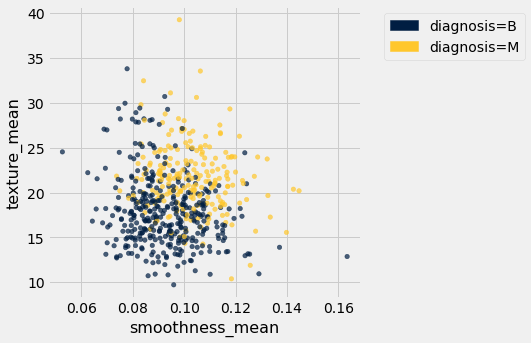

In [ ]:
texture_v_smoothness = cancer.scatter('smoothness_mean', 'texture_mean', group='diagnosis')

Radius se vs. perimeter se

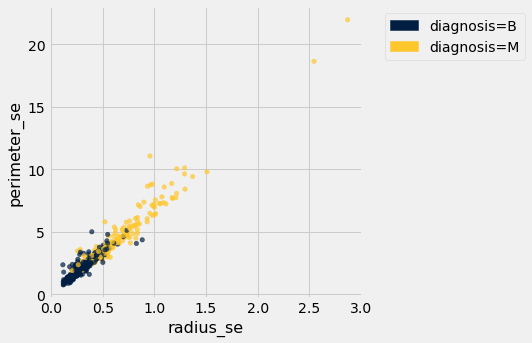

In [ ]:
radiusse_v_perimeterse = cancer.scatter('radius_se', 'perimeter_se', group='diagnosis')

Concavity worst vs. concavity se

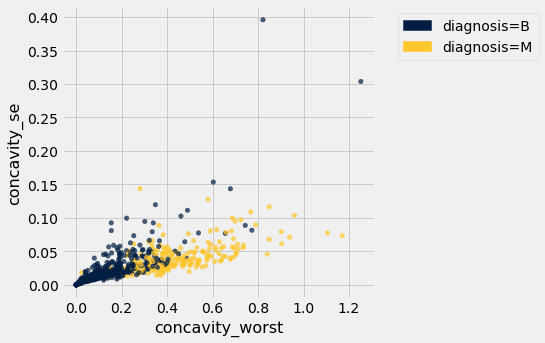

In [ ]:
concavityworst_v_se = cancer.scatter('concavity_worst', 'concavity_se',group='diagnosis')

#Correlation and regression between area worst and radius worst









In [ ]:
x = cancer.column('radius_worst')
y = cancer.column('area_worst')

mean_x = np.mean(x)
x_deviations = x - mean_x

mean_y = np.mean(y)
y_deviations = y - mean_y

covariance = np.mean(x_deviations * y_deviations)
covariance

sqr_x_dev = np.square(x_deviations)
sqr_y_dev = np.square(y_deviations)

x_var = np.mean(sqr_x_dev)
y_var = np.mean(sqr_y_dev)

x_sd = np.sqrt(x_var)
y_sd = np.sqrt(y_var)

cc = covariance / (x_sd * y_sd)
cc

0.98401456445907376

In [ ]:
slope = cc * (y_sd/x_sd)
intercept = mean_y - (cc * (y_sd/x_sd) * mean_x)
print(slope, intercept)

def lin_reg(slope, intercept):
    lin_reg = Table.read_table('cancer_diagnosis_data.csv')
    x = lin_reg.column('radius_worst')
    y = lin_reg.column('area_worst')
    predictions = Table().with_columns('Y Prediction', make_array())
    for i in x:
        prediction = (slope * i) + intercept
        predictions.append((prediction,))
        y_prediction = predictions.column('Y Prediction')
    error = y - y_prediction
    rsme = np.sqrt(np.mean(error**2))
    return rsme
parameters = minimize(lin_reg)
print(parameters)

115.917146668 -1005.29493269
[  122.43947449 -1114.01446414]


Linear regression

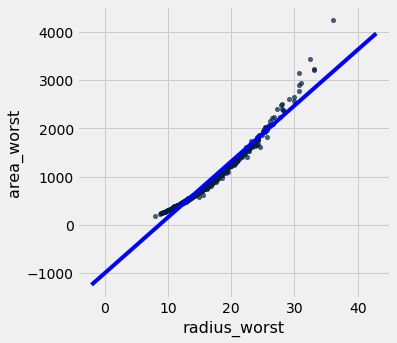

In [ ]:
lin_reg_plot = cancer.scatter('radius_worst', 'area_worst')
regline_x_values = np.arange(min(x)-10, max(x)+10, 5)
regline_y_values = regline_x_values * slope + intercept
plots.plot(regline_x_values, regline_y_values, 'b')
lin_reg_plot

In [ ]:
def quadratic_rmse(a, b, c):
  x = cancer.column('radius_worst')
  y = cancer.column('area_worst')

  predictions = Table().with_columns('Y Prediction', make_array())
  for i in x:
      prediction = (a*(i*i)+(b*i)+c)
      predictions.append((prediction,))
      y_prediction = predictions.column('Y Prediction')
  error = y - y_prediction
  rsme = np.sqrt(np.mean(error**2))
  return rsme
    
parameters = minimize(quadratic_rmse)

print(parameters)

[ 3.05714413  0.26431552 -4.28152868]


In [ ]:
model = np.poly1d(np.polyfit(x, y, 2))


Quadratic regression

       2
3.117 x - 2.053 x + 16.36


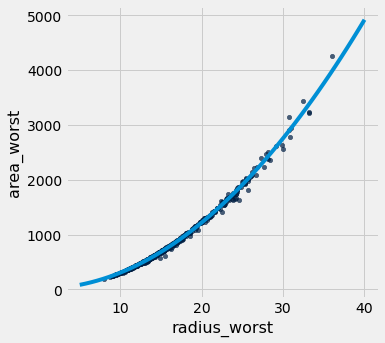

In [ ]:


quad_reg = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(5, 40, 50)

quad_reg_plot = cancer.scatter('radius_worst', 'area_worst')
plots.plot(polyline, model(polyline))
print(quad_reg)

Linear RMSE = 0.6400449
Quadratic RMSE = 0.26431552
Quadratic RMSE is considerably smaller than linear RMSE

#Random (80/20) split the data into training and test sets



[1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 0 0 0 1]
[0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 

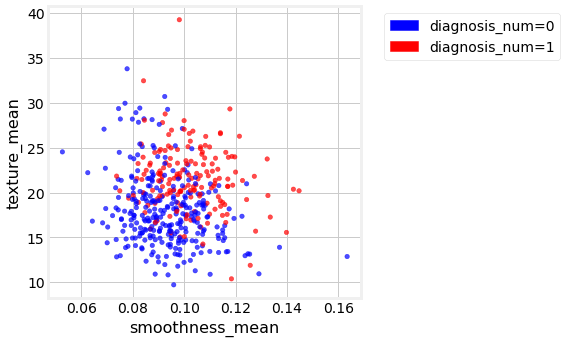

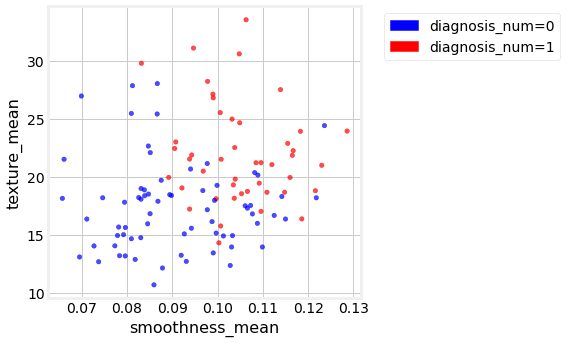

In [ ]:
Table.chart_colors=('blue', 'red')

plots.rcParams['figure.facecolor']='white'
plots.rcParams['axes.facecolor']='white'

sample_size = cancer.num_rows
training_size = int(cancer.num_rows * 0.8)
shuffled_sample = cancer.shuffle()
training = shuffled_sample.take(np.arange(0, training_size))
test = shuffled_sample.take(np.arange(training_size, sample_size))

training.scatter('smoothness_mean', 'texture_mean', group='diagnosis_num')
test.scatter('smoothness_mean', 'texture_mean', group='diagnosis_num')
print(training.column('diagnosis_num'))
print(test.column('diagnosis_num'))

#Classification

In [ ]:
def standard_units(table, column_name):
    table_column = table.column(column_name)
    mean = np.mean(table_column)
    std = np.std(table_column)
    std_units = (table_column -mean) / std
    return std_units

Train vs. test concave points mean and radius worst

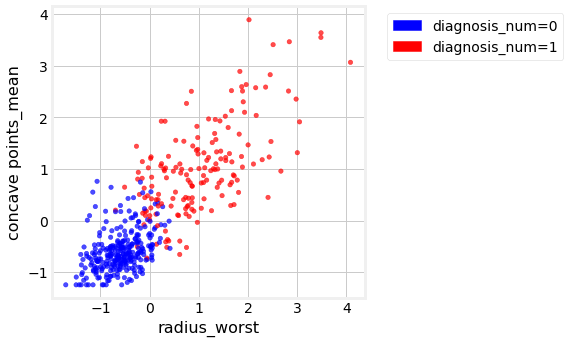

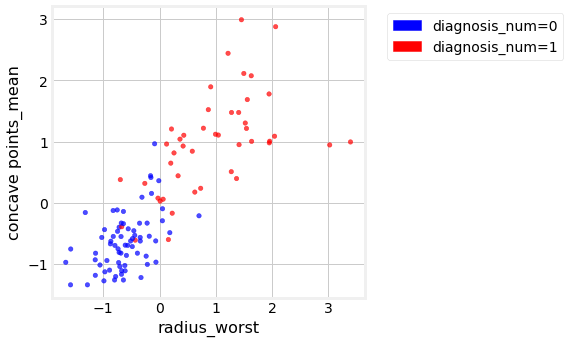

In [ ]:
train_std = training.with_columns("radius_worst", standard_units(training, "radius_worst"),
                                   "concave points_mean", standard_units(training, "concave points_mean"))
                                   

test_std = test.with_columns("radius_worst", standard_units(test, "radius_worst"),
                                   "concave points_mean", standard_units(test, "concave points_mean"))

train_std.scatter('radius_worst', 'concave points_mean', group = 'diagnosis_num')
test_std.scatter('radius_worst', 'concave points_mean', group='diagnosis_num')

In [ ]:
def distance(point_1, point_2):
    norm_distance = point_1 - point_2
    norm_distance_sqrd = norm_distance ** 2
    sum = 0
    for i in np.arange(len(norm_distance_sqrd)):
        sum = sum + norm_distance_sqrd[i]
    return sum ** 1/2

In [ ]:
def nearest_neighbors(k, datapoint):
    distances = np.zeros(train_std.num_rows)
    diagnoses = train_std.column('diagnosis_num')
    for i in np.arange(train_std.num_rows):
        example_point = make_array(train_std.column('radius_worst')[i],
                                   train_std.column('concave points_mean')[i])
        distances[i] = distance(example_point, datapoint)
    sorted_indices = np.argsort(distances)
    nearest_neighbors = sorted_indices[:k]
    neighbor_classes = diagnoses[nearest_neighbors]
    if sum(neighbor_classes) > k/2:
        return 1
    else:
        return 0

K-NN with k=1 (2 features)

In [ ]:
k=1

predictions = Table().with_columns('Actual Diagnosis', make_array(),
                                   'Predicted Diagnosis', make_array())

for i in np.arange(test_std.num_rows):
    datapoint = make_array(train_std.column('radius_worst')[i],
                                   train_std.column('concave points_mean')[i])
    actual_diagnosis = test_std.column('diagnosis_num')
    predicted_diagnosis = nearest_neighbors(k, datapoint)
    predictions.append((actual_diagnosis, predicted_diagnosis))

In [ ]:
actual_diagnosis = predictions.column('Actual Diagnosis')
predicted_diagnosis = predictions.column('Predicted Diagnosis')

num_correct = 0
for i in np.arange(predictions.num_rows):
    actual_diagnosis = predictions.column('Actual Diagnosis')[i]
    predicted_diagnosis = predictions.column('Predicted Diagnosis')[i]
    if actual_diagnosis == predicted_diagnosis:
        num_correct = num_correct + 1
print(num_correct / predictions.num_rows)

0.5087719298245614


K-NN with k=3 (2 features)

In [ ]:
k=3

predictions = Table().with_columns('Actual Diagnosis', make_array(),
                                   'Predicted Diagnosis', make_array())

for i in np.arange(test_std.num_rows):
    datapoint = make_array(train_std.column('radius_worst')[i],
                                   train_std.column('concave points_mean')[i])
    actual_diagnosis = test_std.column('diagnosis_num')
    predicted_diagnosis = nearest_neighbors(k, datapoint)
    predictions.append((actual_diagnosis, predicted_diagnosis))

In [ ]:
actual_diagnosis = predictions.column('Actual Diagnosis')
predicted_diagnosis = predictions.column('Predicted Diagnosis')

num_correct = 0
for i in np.arange(predictions.num_rows):
    actual_diagnosis = predictions.column('Actual Diagnosis')[i]
    predicted_diagnosis = predictions.column('Predicted Diagnosis')[i]
    if actual_diagnosis == predicted_diagnosis:
        num_correct = num_correct + 1
print(num_correct / predictions.num_rows)

0.47368421052631576


In [ ]:
def nearest_neighbors(k, datapoint):
    distances = np.zeros(train_std.num_rows)
    diagnoses = train_std.column('diagnosis_num')
    for i in np.arange(train_std.num_rows):
        example_point = make_array(train_std.column('radius_worst')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('area_worst')[i],
                                   train_std.column('area_mean')[i])
        distances[i] = distance(example_point, datapoint)
    sorted_indices = np.argsort(distances)
    nearest_neighbors = sorted_indices[:k]
    neighbor_classes = diagnoses[nearest_neighbors]
    if sum(neighbor_classes) > k/2:
        return 1
    else:
        return 0

K-NN with k=3 (4 features)

In [ ]:
k=3

predictions = Table().with_columns('Actual Diagnosis', make_array(),
                                   'Predicted Diagnosis', make_array())

for i in np.arange(test_std.num_rows):
    datapoint = make_array(train_std.column('radius_worst')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('area_worst')[i],
                                   train_std.column('area_mean')[i])
    actual_diagnosis = test_std.column('diagnosis_num')
    predicted_diagnosis = nearest_neighbors(k, datapoint)
    predictions.append((actual_diagnosis, predicted_diagnosis))

In [ ]:
actual_diagnosis = predictions.column('Actual Diagnosis')
predicted_diagnosis = predictions.column('Predicted Diagnosis')

num_correct = 0
for i in np.arange(predictions.num_rows):
    actual_diagnosis = predictions.column('Actual Diagnosis')[i]
    predicted_diagnosis = predictions.column('Predicted Diagnosis')[i]
    if actual_diagnosis == predicted_diagnosis:
        num_correct = num_correct + 1
print(num_correct / predictions.num_rows)

0.543859649122807


In [ ]:
def nearest_neighbors(k, datapoint):
    distances = np.zeros(train_std.num_rows)
    diagnoses = train_std.column('diagnosis_num')
    for i in np.arange(train_std.num_rows):
        example_point = make_array(train_std.column('radius_worst')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('area_worst')[i],
                                   train_std.column('area_mean')[i],
                                   train_std.column('smoothness_mean')[i],
                                   train_std.column('compactness_mean')[i],
                                   train_std.column('concavity_mean')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('symmetry_mean')[i],
                                   train_std.column('fractal_dimension_mean')[i],
                                   train_std.column('radius_se')[i],
                                   train_std.column('texture_se')[i],
                                   train_std.column('perimeter_se')[i],
                                   train_std.column('area_se')[i],
                                   train_std.column('smoothness_se')[i],
                                   train_std.column('compactness_se')[i],
                                   train_std.column('concavity_se')[i],
                                   train_std.column('concave points_se')[i],
                                   train_std.column('symmetry_se')[i],
                                   train_std.column('fractal_dimension_se')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('radius_worst')[i],
                                   train_std.column('texture_worst')[i],
                                   train_std.column('perimeter_worst')[i],
                                   train_std.column('area_worst')[i],
                                   train_std.column('smoothness_worst')[i],
                                   train_std.column('compactness_worst')[i],
                                   train_std.column('concave points_worst')[i],
                                   train_std.column('symmetry_worst')[i],
                                   train_std.column('fractal_dimension_worst')[i])
        distances[i] = distance(example_point, datapoint)
    sorted_indices = np.argsort(distances)
    nearest_neighbors = sorted_indices[:k]
    neighbor_classes = diagnoses[nearest_neighbors]
    if sum(neighbor_classes) > k/2:
        return 1
    else:
        return 0

K-NN with k=3 (all features)

In [ ]:
k=3

predictions = Table().with_columns('Actual Diagnosis', make_array(),
                                   'Predicted Diagnosis', make_array())

for i in np.arange(test_std.num_rows):
    datapoint = make_array(train_std.column('radius_mean')[i],
                                   train_std.column('texture_mean')[i],
                                   train_std.column('perimeter_mean')[i],
                                   train_std.column('area_mean')[i],
                                   train_std.column('smoothness_mean')[i],
                                   train_std.column('compactness_mean')[i],
                                   train_std.column('concavity_mean')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('symmetry_mean')[i],
                                   train_std.column('fractal_dimension_mean')[i],
                                   train_std.column('radius_se')[i],
                                   train_std.column('texture_se')[i],
                                   train_std.column('perimeter_se')[i],
                                   train_std.column('area_se')[i],
                                   train_std.column('smoothness_se')[i],
                                   train_std.column('compactness_se')[i],
                                   train_std.column('concavity_se')[i],
                                   train_std.column('concave points_se')[i],
                                   train_std.column('symmetry_se')[i],
                                   train_std.column('fractal_dimension_se')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('radius_worst')[i],
                                   train_std.column('texture_worst')[i],
                                   train_std.column('perimeter_worst')[i],
                                   train_std.column('area_worst')[i],
                                   train_std.column('smoothness_worst')[i],
                                   train_std.column('compactness_worst')[i],
                                   train_std.column('concave points_worst')[i],
                                   train_std.column('symmetry_worst')[i],
                                   train_std.column('fractal_dimension_worst')[i])
                                    
    actual_diagnosis = test_std.column('diagnosis_num')
    predicted_diagnosis = nearest_neighbors(k, datapoint)
    predictions.append((actual_diagnosis, predicted_diagnosis))

In [ ]:
actual_diagnosis = predictions.column('Actual Diagnosis')
predicted_diagnosis = predictions.column('Predicted Diagnosis')

num_correct = 0
for i in np.arange(predictions.num_rows):
    actual_diagnosis = predictions.column('Actual Diagnosis')[i]
    predicted_diagnosis = predictions.column('Predicted Diagnosis')[i]
    if actual_diagnosis == predicted_diagnosis:
        num_correct = num_correct + 1
print(num_correct / predictions.num_rows)

0.5263157894736842


K-NN with k=5 (all features)

In [ ]:
k=5

predictions = Table().with_columns('Actual Diagnosis', make_array(),
                                   'Predicted Diagnosis', make_array())

for i in np.arange(test_std.num_rows):
    datapoint = make_array(train_std.column('radius_mean')[i],
                                   train_std.column('texture_mean')[i],
                                   train_std.column('perimeter_mean')[i],                                   train_std.column('area_mean')[i],
                                   train_std.column('smoothness_mean')[i],
                                   train_std.column('compactness_mean')[i],
                                   train_std.column('concavity_mean')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('symmetry_mean')[i],
                                   train_std.column('fractal_dimension_mean')[i],
                                   train_std.column('radius_se')[i],
                                   train_std.column('texture_se')[i],
                                   train_std.column('perimeter_se')[i],
                                   train_std.column('area_se')[i],
                                   train_std.column('smoothness_se')[i],
                                   train_std.column('compactness_se')[i],
                                   train_std.column('concavity_se')[i],
                                   train_std.column('concave points_se')[i],
                                   train_std.column('symmetry_se')[i],
                                   train_std.column('fractal_dimension_se')[i],
                                   train_std.column('concave points_mean')[i],
                                   train_std.column('radius_worst')[i],
                                   train_std.column('texture_worst')[i],
                                   train_std.column('perimeter_worst')[i],
                                   train_std.column('area_worst')[i],
                                   train_std.column('smoothness_worst')[i],
                                   train_std.column('compactness_worst')[i],
                                   train_std.column('concave points_worst')[i],
                                   train_std.column('symmetry_worst')[i],
                                   train_std.column('fractal_dimension_worst')[i])
                                    
    actual_diagnosis = test_std.column('diagnosis_num')
    predicted_diagnosis = nearest_neighbors(k, datapoint)
    predictions.append((actual_diagnosis, predicted_diagnosis))

In [ ]:
actual_diagnosis = predictions.column('Actual Diagnosis')
predicted_diagnosis = predictions.column('Predicted Diagnosis')

num_correct = 0
for i in np.arange(predictions.num_rows):
    actual_diagnosis = predictions.column('Actual Diagnosis')[i]
    predicted_diagnosis = predictions.column('Predicted Diagnosis')[i]
    if actual_diagnosis == predicted_diagnosis:
        num_correct = num_correct + 1
print(num_correct / predictions.num_rows)

0.543859649122807


Last model worked the best. Out of these models it would most likely to be the most accurate, however often using so many features is not the best idea. Optimally there would be a few features at most that are just as accurate at giving a prediction.